# Applying Deep Learning to Language Tasks

This session and notebook will extend our exploration of Natural Language Processing (NLP) in the Humanities into the area of [Natural Language Understanding](https://en.wikipedia.org/wiki/Natural-language_understanding) (NLU) through the use of the incredible [transformers python library](https://huggingface.co/transformers/) brought to us by [Hugging Face](https://huggingface.co).

### Save a Copy of Notebook
Remember to save a copy of this notebook so you can add notes and run cells and make changes as you see fit. 

`File --> Save a Copy in Drive`

Or save to github if you prefer. 

## Deep Learning
A subset of Machine Learning that uses neural networks with multiple hidden layers of neurons. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/AI-ML-DL.svg/1200px-AI-ML-DL.svg.png" width="600"></img>

Image source - [Deep Learning on wikipedia](https://en.wikipedia.org/wiki/Deep_learning)

## Deep Learning and Neural Networks

![](https://raw.githubusercontent.com/hlab-repo/data_science_colloquium/master/F2.large.jpg)

[Image Source](https://www.pnas.org/content/116/4/1074)


## Transformers
Neural Networks using "attention" to look at more than just the next word following a single word in a sequence.

[Attention is All You Need](https://arxiv.org/abs/1706.03762) - the paper that introduced attention. Pascal Poupart provides an excellent discussion of [attention and transformers](https://www.youtube.com/watch?v=OyFJWRnt_AY).

![](https://raw.githubusercontent.com/hlab-repo/data_science_colloquium/master/E50A8FA3-43A1-4E20-BE93-3A6B3FC1A85E.jpeg)

Image Source - [Chaitanya K. Joshi, "Transformers are Graph Neural Networks"](https://thegradient.pub/transformers-are-graph-neural-networks/)

## Hugging Face Transformers Library

Two major takehomes from this session:
1. There are massive pre-trained language models available for humanities scholars to use in increasingly accessible ways.
2.  These pre-trained models can be __further trained__ on a corpus of interest to focus on your specific research questions and interests.

![](https://raw.githubusercontent.com/hlab-repo/data_science_colloquium/master/6143CE0D-0E4F-429C-8A8D-56B913C41F9F.jpeg)

Image Source - [State of AI Report 2020](https://www.stateof.ai)

## Set-up

In [ ]:
%%capture
!pip install transformers

In [ ]:
import re
import requests
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, pipeline

We will use Gorgias' Encomium of Helen and Plato's Gorgias as examples in what follows. Here is the introduction to the Encomium.

In [ ]:
encomium = ('The order proper to a city-state is being well-manned; to a body, beauty; to a soul, wisdom; to a deed, '
            'excellence; and to a discourse, truth--and the opposites of these are disorder. And the praiseworthy man '
            'and woman and discourse and work and city-state and deed one must honor with praise, while one must assign '
            'blame to the unworthy--for it is equal error and ignorance to blame the praiseworthy and to praise the '
            'blameworthy. It being required of the same man both to speak straight and to refute [crooked speech, one '
            'should refute] those blaming Helen, a woman concerning whom the testimony of those who are called poets has '
            'become univocal and unanimous--likewise the repute of her name, which has become a byword for calamities. And '
            'by bestowing some rationality on the discourse, I myself wish to absolve this ill-reputed woman from responsibility, '
            'and to show that those who blame her are lying--and, having shown the truth, to put an end to ignorance. It is '
            'not unclear, not even to a few, that the woman who is the subject of this discourse was the foremost of the foremost '
            'men and women, by nature and by birth. For it is clear that her mother was Leda and her father was in fact the god, but '
            'said to be mortal, Tyndareus and Zeus--of whom the one, by being, seemed, while the other, by speech, was disproved--and '
            'the one was the mightiest of men while the other was tyrant over all.')

# The Tasks
You can use any model and corresponding tokenizer from [Hugging Face's main web page](https://huggingface.co). Or you can leave out the `model` and `tokenizer` keyword arguments for any of the following models to use the default model and tokenizer.

## Text Generation
Not a classic NLU problem. Typically considered an NLP problem or often considered its own subcategory, Natural Language Generation (NLG). Does a model need to understand in order to generate?

Last session, we saw [KJV Bot](https://twitter.com/kjvbot?s=21), also a text generator, but using Markov chains not neural networks. 

QUESTION: How do human beings construct language from a probabilistic perspective?

### GPT-2
GPT-2 is an iteration of a generic language model produced by OpenAI "trained simply to predict the next word in 40GB of Internet text." You can find more details on GPT-2 in [OpenAI's paper on its release](https://openai.com/blog/better-language-models/). They have since released an even larger model, [GPT-3](https://arxiv.org/abs/2005.14165). For a fun example of the power of these generative models, see the [Guardian article written entirely by GPT-3](https://www.theguardian.com/commentisfree/2020/sep/08/robot-wrote-this-article-gpt-3).

The most helpful articulation I have ever seen of how transformers work and how GPT-2 in particular works is in [Jay Alammar's "The Illustrated GPT-2 (Visualizing Transformer Language Models")](http://jalammar.github.io/illustrated-gpt2/)

In [ ]:
%%capture
text_generator = GPT2LMHeadModel.from_pretrained('gpt2-medium')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')

In [ ]:
input_ids = tokenizer.encode("Tell me, Gorgias, what is rhetoric?", return_tensors='pt')
input_ids

Let's walk through how to generate text based upon a number of different sampling methods. Note that strict "greedy" decoding is not very effective! We *cannot* just take the most probable next word at every step! For an instructive blog post (from which we borrow some images here), see [this Hugging Face link](https://huggingface.co/blog/how-to-generate).

### Beam Search
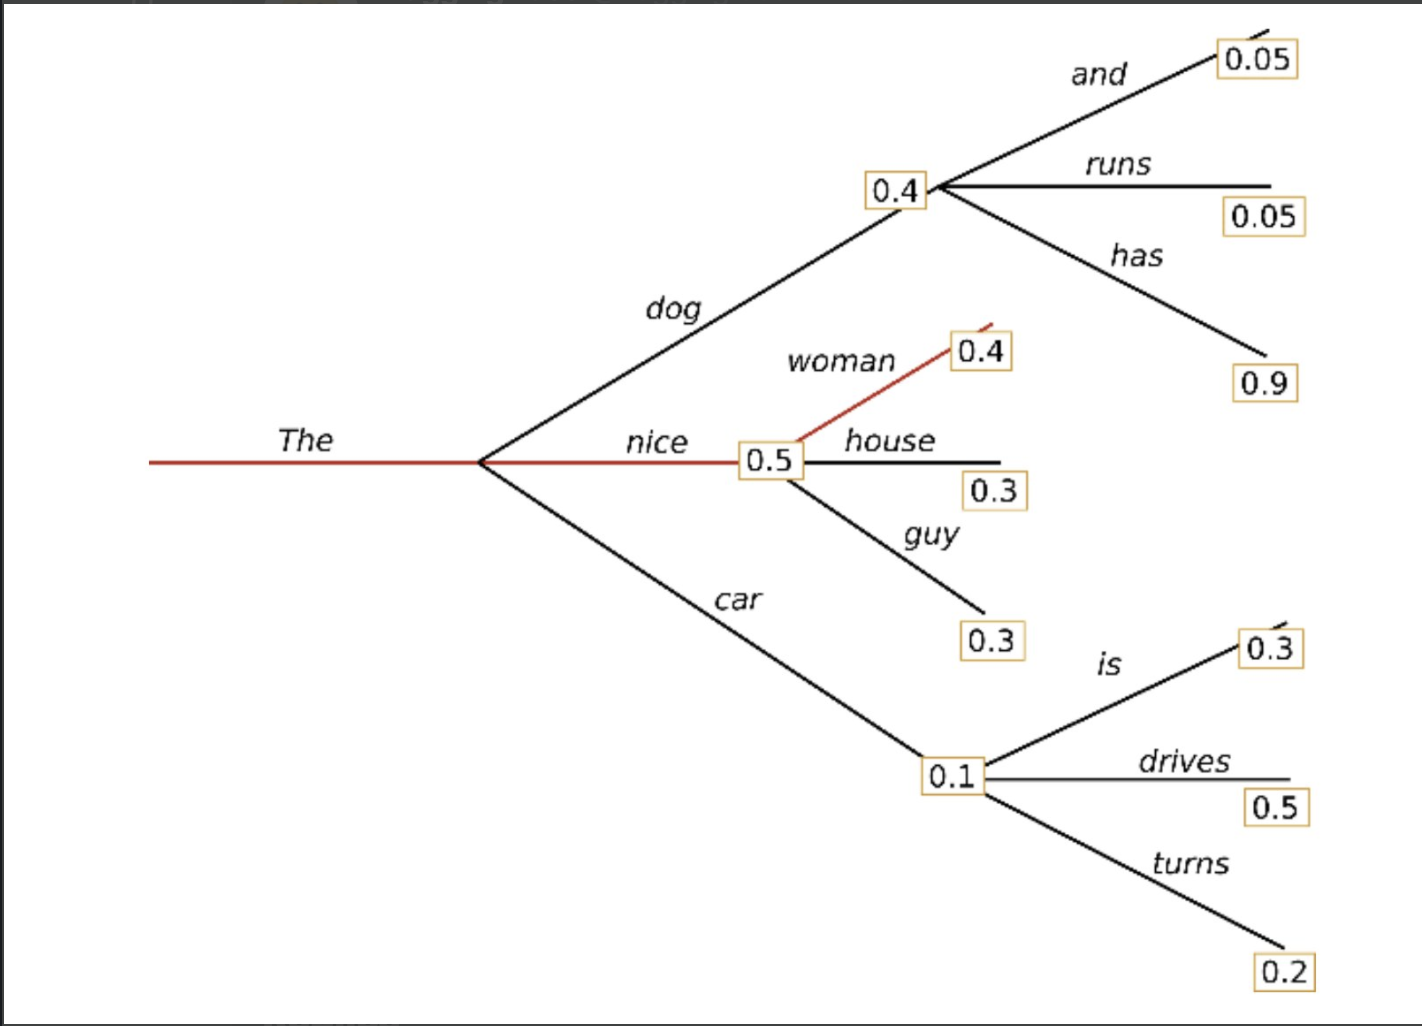

In [ ]:
output = text_generator.generate(input_ids,
                                 min_length=50,          # min length of final sequence
                                 max_length=120,         # max length of final sequence
                                 num_beams=1,            # favor probability of paths over probability of words
                                 do_sample=False,        # randomly pick next word according to probability distribution
                                 top_k=None,             # words that should be considered at every step
                                 top_p=1.,               # choose from smallest possible set of words whose cumulative probability exceeds the probability p
                                 # temperature = softmax of (logits / temperature); lower == more deterministic; higher == more excitable 
                                 temperature=1.,
                                 repetition_penalty=1.,  # discounts the scores of previously generated tokens (1 == do not apply)
                                 pad_token_id=50256)     # i include this just to silence an error
output

In [ ]:
tokenizer.decode(output[0])  # start with greedy decoding to show how repetitive this is!

### Top-K Search
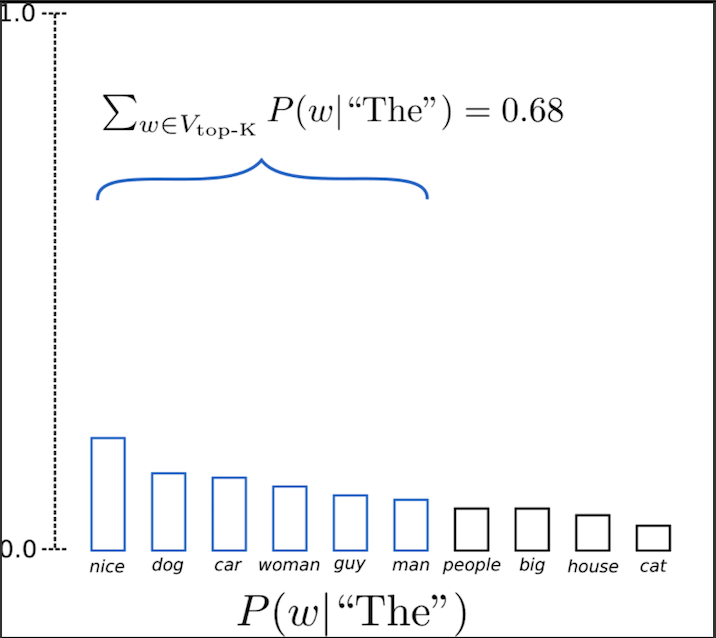

### Top-P Search
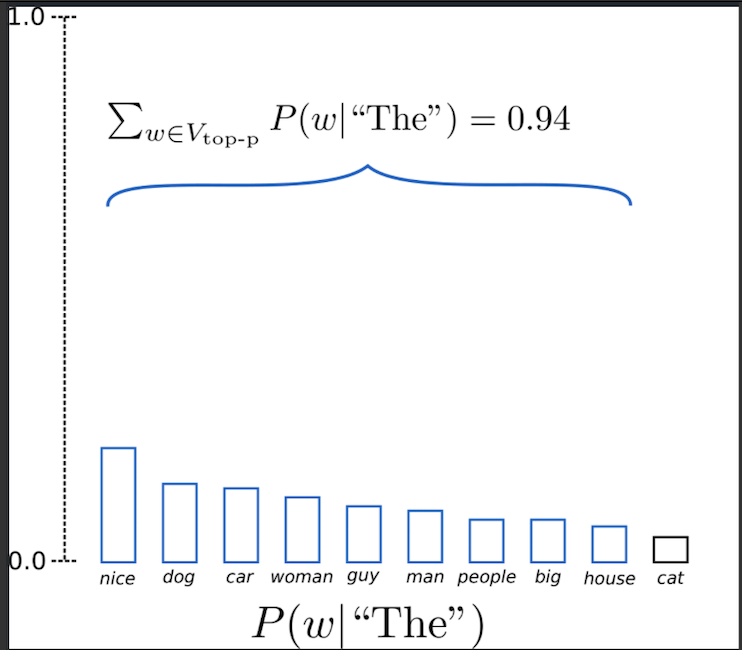

## Natural Language Understanding (NLU) 
A subset of NLP, where language/text is provided as input and machines read/interpret this text to perform actions that demonstrate understanding. 

![](https://raw.githubusercontent.com/hlab-repo/data_science_colloquium/master/DFE14FED-75EA-4642-9B24-9586383A2B37.jpeg)
Image source - [Stanford NLP](https://nlp.stanford.edu/~wcmac/papers/20140716-UNLU.pdf)


## Sentiment Analysis
Base model in transformers libary is trained on movie reviews and trained for a binary classification task, whether the review is positive or negative. There are sentiment analysis methods that use 3 (add neutral) or 5 classes (imagine a Leikert scale of sorts).

In [ ]:
%%capture
classifier = pipeline('sentiment-analysis',
                      model='distilbert-base-uncased-finetuned-sst-2-english',
                      tokenizer='distilbert-base-uncased-finetuned-sst-2-english')

In [ ]:
classifier('This movie is SO predictable it made me sick.')

In [ ]:
classifier('The journey Zhao has crafted is marvelous, exploring literal peaks and valleys as well as emotional ones.')

In [ ]:
classifier(encomium)

## Question Answering

The goal of extractive question answering
(EQA) is to find the span boundaries (the start and end indices of a context) that answer
a question.



In [ ]:
%%capture
question_answerer = pipeline('question-answering',
                             model='mrm8488/bert-medium-finetuned-squadv2',
                             tokenizer='mrm8488/bert-medium-finetuned-squadv2')

In [ ]:
question_answerer(question='How far did Bell drive?',
                  context='Bell picked up 143 papers and 14 bottles and placed them in a basket. Then she drove 12 miles.')

In [ ]:
question_answerer(question='As far as deeds go, what constitutes order?',
                  context=encomium)

## Summarization
The goal of extractive summarization is to identify what content from the text best summarizes the text.

In [ ]:
%%capture
summarizer = pipeline('summarization',
                      model='facebook/bart-large-cnn',
                      tokenizer='facebook/bart-large-cnn',
                      device=0)

In [ ]:
summarizer(encomium)

In [ ]:
def get_gutenberg_texts(gutenberg_txt_url):
    response = requests.get(gutenberg_txt_url)
    gutenberg_text = response.text.replace('\r\n', ' ')
    splits = re.split(r'gutenberg', gutenberg_text, flags=re.IGNORECASE)
    text = max(splits, key=len)
    texts = re.findall(r'((\s+\S+){450,525}[.!?])', text, flags=re.DOTALL)
    return [t[0] for t in texts]

In [ ]:
def summarize(gutenberg_txt_url):
    texts = get_gutenberg_texts(gutenberg_txt_url)
    while len(texts) > 1:
        for i in range(0, len(texts), 8):
            if texts[i:i + 8]:
                summaries = summarizer(texts[i:i + 8])
                texts[i:i + 8] = [' '.join(summary['summary_text'] for summary in summaries)]
    return summarizer(texts[0]) if texts else []

In [ ]:
# summarize Plato's Gorgias
summarize('http://www.gutenberg.org/cache/epub/1672/pg1672.txt')

## Zero-Shot Classification
Zero-shot learning (ZSL) is a problem setup in machine learning. At test time, a learner observes samples from classes that were not observed during training and predicts the category they belong to. 

In [ ]:
%%capture
classifier = pipeline('zero-shot-classification')

In [ ]:
question = 'Who are the best teachers?'
candidate_labels = ['physicists', 'chemists', 'humanists', 'artists']

classifier(question, candidate_labels)

In [ ]:
question = 'What is rhetoric?'
candidate_labels = ['flattery', 'truth', 'a knack']

classifier(question, candidate_labels)

In [ ]:
classifier.model

# Training a Model
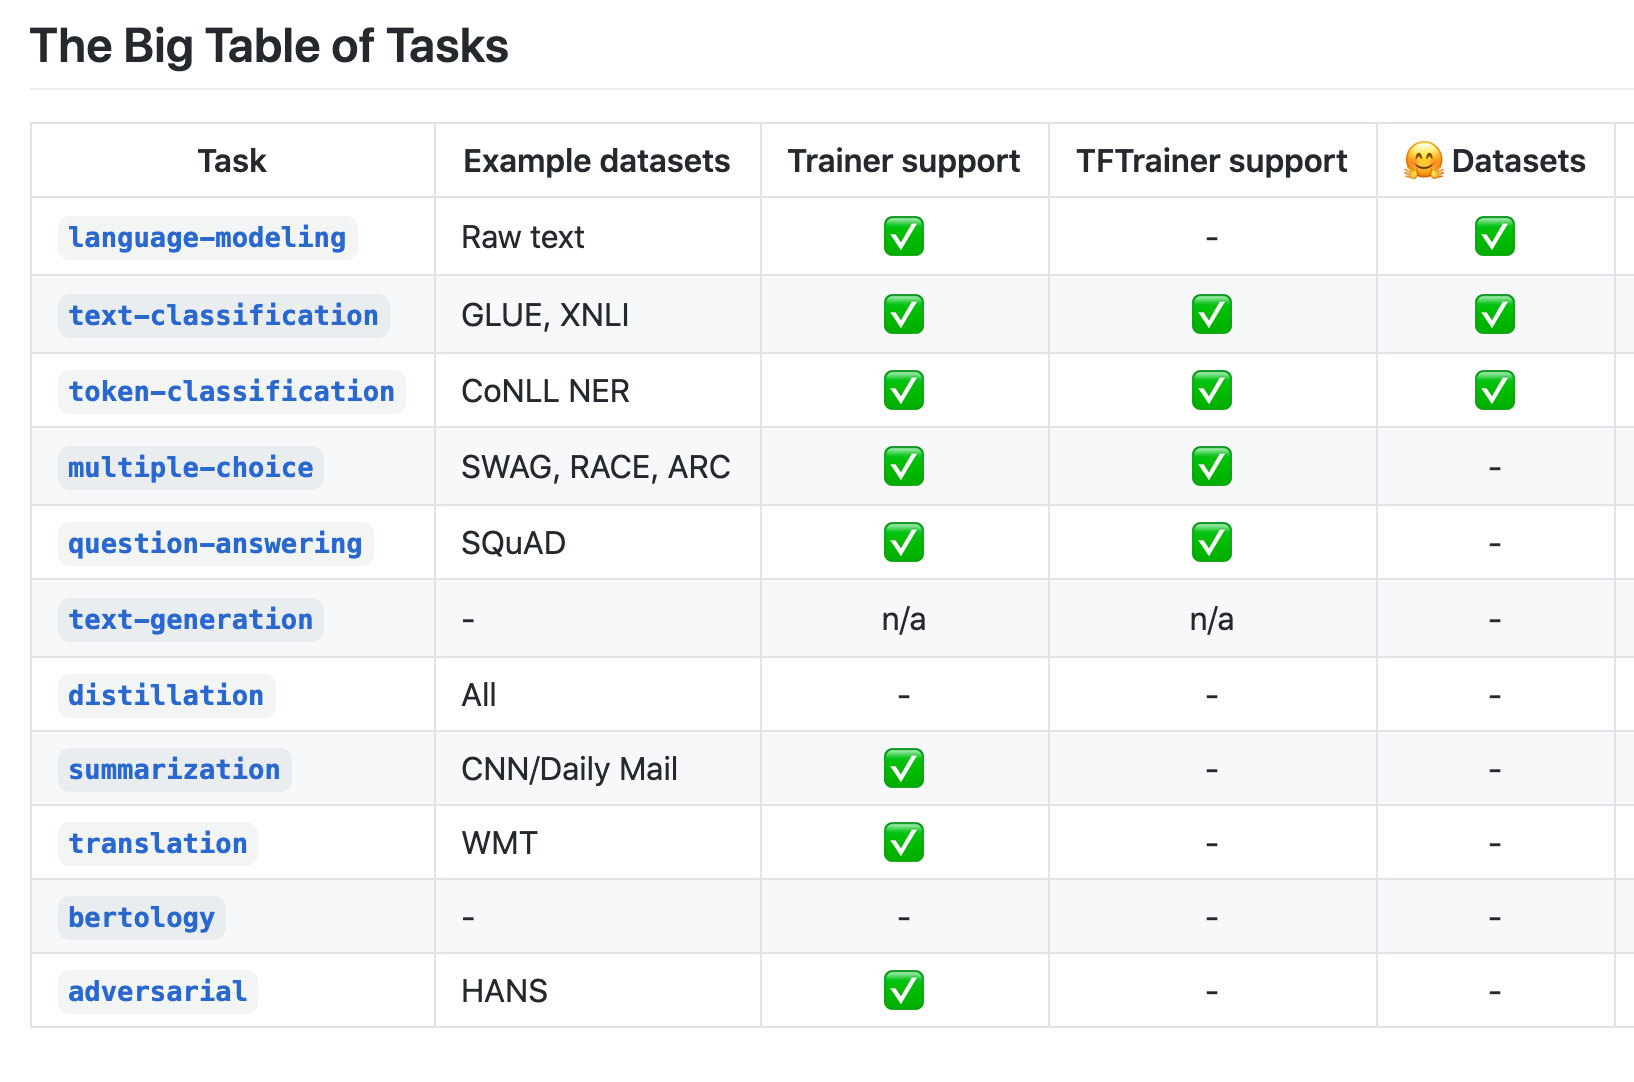

## Simple Training on an Existing Dataset: `multi_nli` (text-classification)
The Multi-Genre Natural Language Inference (MultiNLI) corpus is a collection of 433k sentence pairs annotated with textual entailment information.


In [ ]:
!pip install datasets
!pip install transformers

In [ ]:
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments

In [ ]:
%%capture
dataset = load_dataset("multi_nli")

In [ ]:
%%capture
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
train = dataset['train'].map(
    lambda batch: tokenizer(
        list(zip(batch['premise'], batch['hypothesis'])),
        truncation=True,
        padding=True
        ), batched=True,
        batch_size=8)

In [ ]:
train.rename_column_("label", "labels")

In [ ]:
train.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total # of training epochs
    per_device_train_batch_size=2,   # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
)

In [ ]:
trainer = Trainer(
    model=model,                     # the instantiated 🤗 Transformers model to be trained
    args=training_args,              # training arguments, defined above
    train_dataset=train,             # training dataset
    tokenizer=tokenizer
)

In [ ]:
trainer.train()

## Token Classification: Named Entity Recognition
Token classification identifies what class each token belongs to.

In [ ]:
%%capture
token_classifier = pipeline('ner')  # named entity recognition

In [ ]:
token_classifier('This is a test sentence written by Barack Obama.')